-------------------------------------------------------

# Bike Sharing dataset  : Make your own solutions using your own analytical skills for prediction.

Based on Bike Sharing dataset from UCI Machine Learning Repository

-------------------------------------------------------------

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datafrm=pd.read_csv('Bike_Rental_data.CSV')


datafrm

,dteday,temp,hum,windspeed,cnt
0,1/1/2011,0.363625,0.805833,0.160446,985
1,1/2/2011,0.353739,0.696087,0.248539,801
2,1/3/2011,0.189405,0.437273,0.248309,1349
3,1/4/2011,0.212122,0.590435,0.160296,1562
4,1/5/2011,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...
726,12/27/2012,0.226642,0.652917,0.350133,2114
727,12/28/2012,0.255046,0.590000,0.155471,3095
728,12/29/2012,0.242400,0.752917,0.124383,1341
729,12/30/2012,0.231700,0.483333,0.350754,1796


In [29]:
datafrm['dteday']=pd.to_datetime(datafrm['dteday'])
datafrm.dtypes

dteday       datetime64[ns]
temp                float64
hum                 float64
windspeed           float64
cnt                   int64
dtype: object

In [30]:
datafrm_detail=pd.DataFrame()
datafrm_detail['Month'] = datafrm['dteday'].dt.month_name()
datafrm_detail['Year'] = datafrm['dteday'].dt.year
datafrm_detail['Day'] = datafrm['dteday'].dt.day_name()
datafrm_detail['Count'] = datafrm['cnt']
datafrm_detail['Workday'] = np.where((datafrm_detail['Day'] == 'Saturday') | (datafrm_detail['Day'] =='Sunday'),'Weekend','Weekday')
datafrm_detail['Tempture'] = datafrm['temp']
datafrm_detail['Humidity'] = datafrm['hum']
datafrm_detail['Windspeed'] = datafrm['windspeed']

In [31]:
datafrm_detail.tail()

,Month,Year,Day,Count,Workday,Tempture,Humidity,Windspeed
726,December,2012,Thursday,2114,Weekday,0.226642,0.652917,0.350133
727,December,2012,Friday,3095,Weekday,0.255046,0.590000,0.155471
728,December,2012,Saturday,1341,Weekend,0.242400,0.752917,0.124383
729,December,2012,Sunday,1796,Weekend,0.231700,0.483333,0.350754
730,December,2012,Monday,2729,Weekday,0.223487,0.577500,0.154846


In [32]:
datafrm_detail.isnull().sum()

Month        0
Year         0
Day          0
Count        0
Workday      0
Tempture     0
Humidity     0
Windspeed    0
dtype: int64

Month


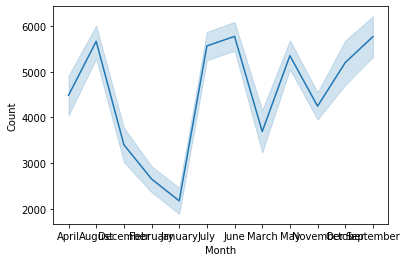

Year


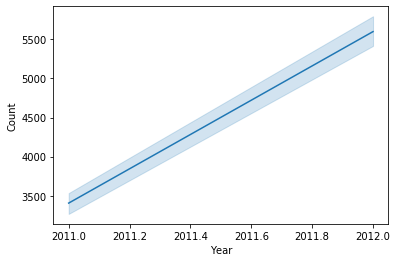

Day


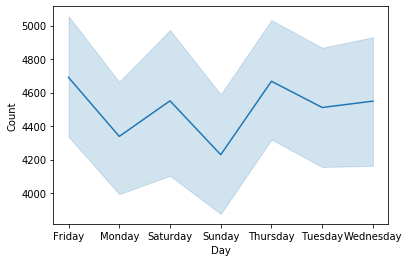

Workday


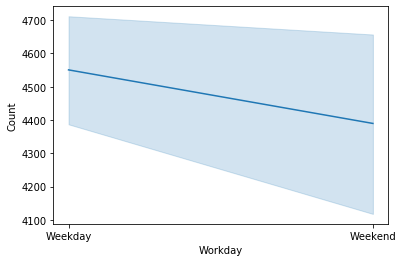

Tempture


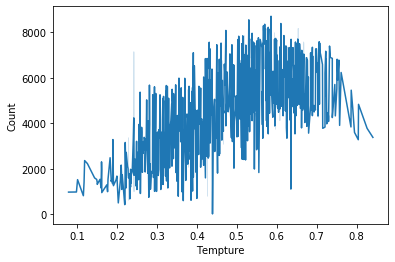

Humidity


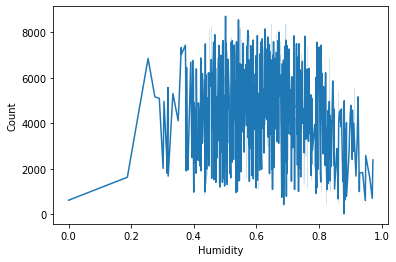

Windspeed


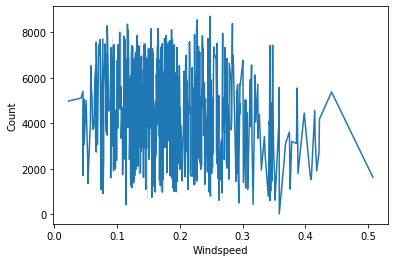

In [33]:
lst=['Count']
for xax in datafrm_detail.columns:
    if xax not in lst:
        print (xax)
        sns.lineplot(x=xax,y='Count',data=datafrm_detail)
        plt.show()
    

Month


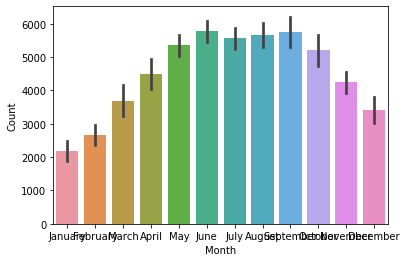

Year


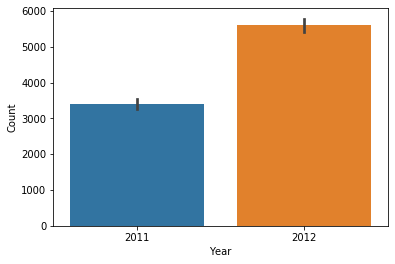

Day


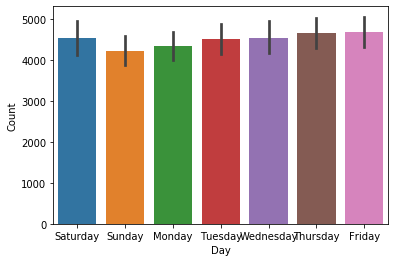

Workday


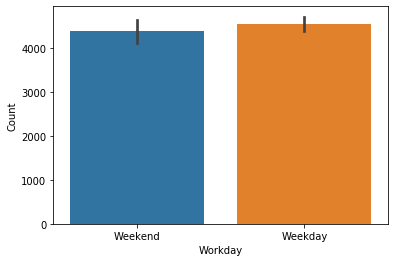

Tempture


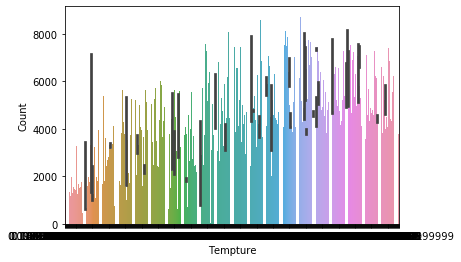

Humidity


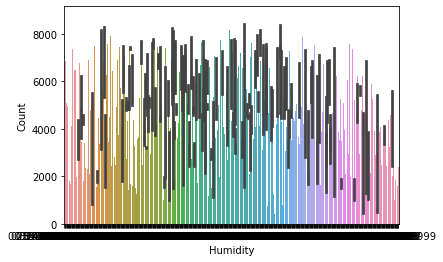

Windspeed


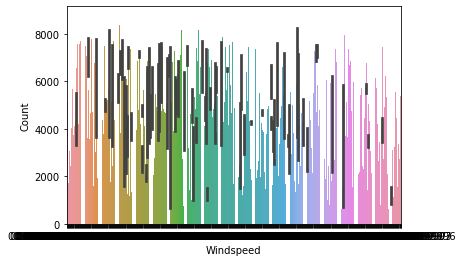

In [34]:
lst=['Count']
for xax in datafrm_detail.columns:
    if xax not in lst:
        print (xax)
        sns.barplot(x=xax,y='Count',data=datafrm_detail)
        plt.show()

--------------------------------------

Mostly If the tempture is high then the bike count is also high. Both are directly Proportional to each other

On weekday bike count is higher than weekend's count

-------------------------

In [35]:
datafrm_detail.head()

,Month,Year,Day,Count,Workday,Tempture,Humidity,Windspeed
0,January,2011,Saturday,985,Weekend,0.363625,0.805833,0.160446
1,January,2011,Sunday,801,Weekend,0.353739,0.696087,0.248539
2,January,2011,Monday,1349,Weekday,0.189405,0.437273,0.248309
3,January,2011,Tuesday,1562,Weekday,0.212122,0.590435,0.160296
4,January,2011,Wednesday,1600,Weekday,0.229270,0.436957,0.186900


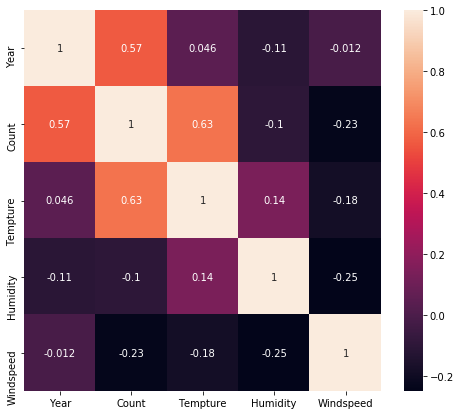

In [36]:
#for i in datafrm_detail['Day']:
#    if ((i == 'Saturday') | (i =='Sunday')):
#        print ('Weekend')
#    else:
#        print ('WeekDay')
corr=datafrm_detail.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True)
plt.show()


Year            AxesSubplot(0.125,0.536818;0.168478x0.343182)
Count        AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Tempture     AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Humidity     AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Windspeed          AxesSubplot(0.125,0.125;0.168478x0.343182)
dtype: object

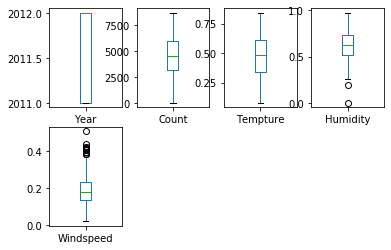

In [37]:
datafrm_detail.plot(kind='box',subplots=True,layout=(2,4))

----------------------------------------

Removing Outliers using Zscore 

----------------------------------

In [38]:
datafrm_detail=datafrm_detail[['Tempture','Humidity','Windspeed','Count']]

from scipy.stats import boxcox,zscore

z=np.abs(zscore(datafrm_detail))
threshold=3


datafrm_detail.shape

(731, 4)

In [39]:
datafrm_detail=datafrm_detail[(z<3).all(axis=1)]


In [40]:
datafrm_detail.shape

(728, 4)

In [41]:
dfx=datafrm_detail[['Tempture','Humidity','Windspeed']]
y=datafrm_detail['Count']

In [42]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x

,Tempture,Humidity,Windspeed
0,-0.679874,1.262278,-0.383243
1,-0.740483,0.476912,0.774469
2,-1.747974,-1.375216,0.771446
3,-1.608702,-0.279156,-0.385214
4,-1.503572,-1.377477,-0.035586
...,...,...,...
723,-1.519683,0.167979,2.109610
724,-1.345546,-0.282269,-0.448624
725,-1.423075,0.883600,-0.857181
726,-1.488674,-1.045601,2.117772


In [43]:
x.skew()

Tempture    -0.133706
Humidity     0.060562
Windspeed    0.601676
dtype: float64

--------------------------------------------------------

To remove skew both methids are not working as the skewness is increasing insted of decressing. So not applying thiese methods

#for col in x.columns:
    if x.skew().loc[col] > 0.55:
        print (col)
        x[col]=boxcox(x[col],0)
#for col in x.columns:
    if x.skew().loc[col] > 0.55:
        print (col)
        x[col]=np.log1p(x[col])
        
-----------------------------------


In [44]:
x.tail()

,Tempture,Humidity,Windspeed
723,-1.519683,0.167979,2.109610
724,-1.345546,-0.282269,-0.448624
725,-1.423075,0.883600,-0.857181
726,-1.488674,-1.045601,2.117772
727,-1.539026,-0.371721,-0.456838


---------------------------
Implementing Algotithms

--------------------

In [45]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,ElasticNet


In [47]:

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=22)
def trn_tst_split(input,output,rs=0):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rs)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred_val=lm.predict(x_test)
    return r2_score(y_test,pred_val)
d={}

for i in range(0,100):
    scr = trn_tst_split(x,y,i)
    if scr > .50:
        d[i]=scr
        #print('Random_value is : ',i, 'Score is : ',scr)
random_st = max(d , key=d.get)

print('Random_value is : ',random_st, 'r2 Score is : ',d[random_st])




Random_value is :  73 r2 Score is :  0.5937288779111487


In [51]:
from sklearn.preprocessing import PolynomialFeatures

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=random_st)


poly=PolynomialFeatures(4)
x_train=poly.fit_transform(x_train)
x_test=poly.fit_transform(x_test)

In [52]:

lm=LinearRegression()
lm.fit(x_train,y_train)
pred_val=lm.predict(x_test)
print('r2 Score of lm model : ', r2_score(y_test,pred_val))

r2 Score of lm model :  0.6393656862516709


---------------------------
Try to increase Score by Boosting Methode

--------------------

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, np.ravel(y_train))
pred = gbr.predict(x_test)

print('---------------------------------------------------------')
print  ( 'r2 value is :', r2_score(y_test,pred))
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
print('Mean Squared Error : ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred)))
print('---------------------------------------------------------')



---------------------------------------------------------
r2 value is : 0.5885096598010806
---------------------------------------------------------
Error :
Mean Absolute Error :  1081.7341108270625
Mean Squared Error :  1720585.3010115072
Root Mean Squared Error :  1311.7108297988193
---------------------------------------------------------


----------------------------
Import the object file with good score 


-------------------------------

In [54]:
import joblib

joblib.dump=('lm,Bike_rental_LinearRegression.pkl')